# 로지스틱 회귀분석

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.datasets import load_breast_cancer

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import confusion_matrix

In [13]:
x_data=np.array([
    [2,1],
    [3,2],
    [3,4],
    [5,5],
    [7,5],
    [2,5],
    [8,9],
    [9,10],
    [6,12],
    [9,2],
    [6,10],
    [2,4],
])
y_data=np.array([0,0,1,1,1,0,1,1,1,1,1,0])
labels=['fail','pass']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size=0.2,random_state=2)


In [19]:
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print("before_accuracy",metrics.accuracy_score(y_test,y_pred))

before_accuracy 0.6666666666666666


In [21]:
cancer = load_breast_cancer()
model = LogisticRegression()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 test_size=0.3,
                                                 random_state=42)
#test_size=0.3 안써주면 default=0.25 (25%)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("before_accuracy",metrics.accuracy_score(y_test,y_pred))
#96% 확률로 암이 생길수 있다                
                                                 


before_accuracy 0.9649122807017544


##  scaler 변환
각 칼럼마다 해주어야 함
- StandardScaler
- MinMaxScaler
- MaxAbsScaler
- RobustScaler


In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("StandardScaler_accuracy",metrics.accuracy_score(y_test,y_pred))


StandardScaler_accuracy 0.965034965034965


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("MinMaxScaler_accuracy",metrics.accuracy_score(y_test,y_pred))


MinMaxScaler_accuracy 0.965034965034965


In [36]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix

scaler=MaxAbsScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("MaxAbsScaler_accuracy",metrics.accuracy_score(y_test,y_pred))


MaxAbsScaler_accuracy 0.965034965034965


In [37]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print("RobustScaler_accuracy",metrics.accuracy_score(y_test,y_pred))


RobustScaler_accuracy 0.965034965034965


# 모델평가

[[4 1]
 [2 3]]


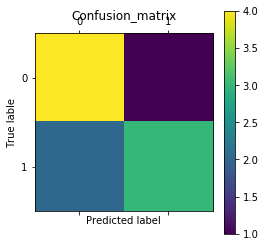

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.title('Confusion_matrix')
plt.colorbar()

plt.ylabel('True lable')
plt.xlabel('Predicted label')
plt.show()

In [53]:
import sklearn.metrics as metrics

x_data=np.array([
    [2,1],
    [3,2],
    [3,4],
    [5,5],
    [7,5],
    [2,5],
    [8,9],
    [9,10],
    [6,12],
    [9,2],
    [6,10],
    [2,4],
])
y_data=np.array([0,0,1,1,1,0,1,1,1,1,1,0])

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size=0.2,
                                                 random_state=2)

labels =['fail','pass']
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
print("before_accuracy",metrics.accuracy_score(y_test,y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,
                            target_names=['class 0','class 1']))


before_accuracy 0.6666666666666666
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00         1
    class 1       0.67      1.00      0.80         2

avg / total       0.44      0.67      0.53         3



/Users/kangjinhee/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 로지스틱 회귀분석 실습 - wine 데이터

In [68]:
import numpy as np
import csv
import pandas as pd
import statsmodels.api as sm

In [69]:
wine_data= pd.read_csv('../Downloads/winequality-white.csv',
                       delimiter=';', dtype=float)


In [74]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6.0


In [99]:
wine_data.iloc[:,0:-1].head()#quality 빼고 나머지 :x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [100]:
wine_data.iloc[:,-1].head(20) #quality 만 : y

0     6.0
1     6.0
2     6.0
3     6.0
4     6.0
5     6.0
6     6.0
7     6.0
8     6.0
9     6.0
10    5.0
11    5.0
12    5.0
13    7.0
14    5.0
15    7.0
16    6.0
17    8.0
18    6.0
19    5.0
Name: quality, dtype: float64

In [101]:
x_data = wine_data.iloc[:,0:-1]
y_data= wine_data.iloc[:,-1]

In [102]:
y_data=np.array([1 if i>=8 else 0 for i in y_data])

In [103]:
y_data[0:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)


In [105]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_true,y_pred =y_test,log_reg.predict(x_test)
print(classification_report(y_true,y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1421
          1       0.00      0.00      0.00        49

avg / total       0.93      0.97      0.95      1470



## 결과 해석
- 통계적으로 유의한지 p-value 확인,
- logit.params로 어떤 변수가 몇배 확률을 영향을 주는지 확인해서 분석
- 예: density가 낮아질수록 품질이 높아짐


In [107]:
logit = sm.Logit(y_train,x_train).fit() # y에 대한 x Logit
logit.summary()

Optimization terminated successfully.
         Current function value: 0.143100
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3428
Model:                          Logit   Df Residuals:                     3417
Method:                           MLE   Df Model:                           10
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.1179
Time:                        14:33:27   Log-Likelihood:                -490.55
converged:                       True   LL-Null:                       -556.12
                                        LLR p-value:                 2.729e-23
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1153      0.138      0.835      0.404      -0.155       0.386
volatile acidity        -2.5585      1.092     -2.343      0.019      -4.699      -0.418
citric acid             -0.8329      0.941     -0.885      0.376      -2.678       1.012
residual sugar           0.0738      0.022      3.362      0.001       0.031       0.117
chlorides               -3.0146      7.500     -0.402      0.688     -17.714      11.684
free sulfur dioxide      0.0235      0.007      3.462      0.001       0.010       0.037
total sulfur dioxide    -0.0014      0.004     -0.411      0.681      -0.008       0.005
density                -16.2508      3.255     -4.992      0.000     -22.631      -9.871
pH                       0.6767      0.744      0.910      0.363      -0.781       2.134
sulphates                0.4109      0.713      0.577      0.564      -0.986       1.808
alcohol                  0.8842      0.098      8.987      0.000       0.691       1.077
========================================================================================
"""

In [108]:
print(np.exp(logit.params))#1보다 작은건 x

fixed acidity           1.122202e+00
volatile acidity        7.742073e-02
citric acid             4.347952e-01
residual sugar          1.076630e+00
chlorides               4.906419e-02
free sulfur dioxide     1.023754e+00
total sulfur dioxide    9.985557e-01
density                 8.756851e-08
pH                      1.967425e+00
sulphates               1.508200e+00
alcohol                 2.421044e+00
dtype: float64


AttributeError: 'LogisticRegression' object has no attribute 'show'

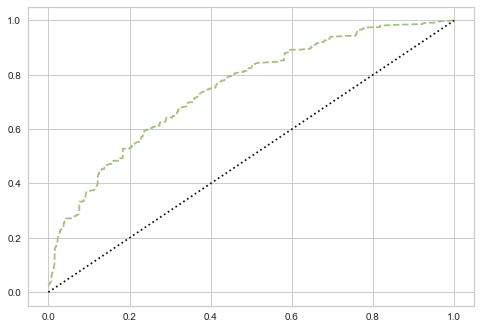

In [127]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(log_reg,classed=[0,1],micro=False,macro=True,
                    per_class=False)
visualizer.fit(x_train,y_train)
visualizer.score(x_train,y_train)
visualizer.show()



# KNN 알고리즘

In [124]:
from sklearn.neighbors import KNeighborsClassifier

X=[[0],[1],[2],[3]]
y=[0,0,1,1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
print(neigh.predict([[1.1]]))#1.1 은 0에 속하고
print(neigh.predict_proba([[0.9]])) #결과값: (0에 속할 확률, 1에 속할 확률)

[0]
[[0.66666667 0.33333333]]


In [126]:
# classifier: KNN알고리즘 모델 만들기
classifier = KNeighborsClassifier(n_neighbors=3, # k =3
                                 weights="distance", 
                                 metric="euclidean")
training_points=[
    [0.5,0.2,0.1],
    [0.9,0.7,0.3],
    [0.4,0.5,0.7]
]
training_labels=[0,1,1]#실제값

#데이터로 모델 학습시키기 
classifier.fit(training_points,training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [130]:
unknown_points=[
    [0.2,0.1,0.7],
    [0.4,0.7,0.6],
    [0.5,0.8,0.1]
]

import numpy as np
guesses = classifier.predict(unknown_points)#예측값
print(guesses)

from sklearn import metrics
#실제값과 예측값의 차이
print("Accuracy:",metrics.accuracy_score(training_labels,guesses))


[1 1 1]
Accuracy: 0.6666666666666666


## KNN 알고리즘 실습 - iris 데이터

In [148]:
from sklearn import datasets
%matplotlib inline

iris=datasets.load_iris()
print(iris.feature_names)

X=iris.data[:,:4]#'sepal length (cm)', 'sepal width (cm)' 2columns만 선택
y=iris.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [147]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X=pd.DataFrame(X_scaled, columns=['sepal length (cm)', 
                                  'sepal width (cm)', 
                                  'petal length (cm)', 
                                  'petal width (cm)'])
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [154]:
x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=30)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

print(clf.score(x_test,y_test))

0.9333333333333333


In [155]:
scores = cross_val_score(classifier,X,y,#과적합 방지
                         cv=5,scoring='accuracy') #cross_value 5번 반복
# train 데이터에 많이 사용, 학습이 잘 되었는지 확인할 때 사용
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.93333333 0.9        1.        ]
0.9533333333333334


## (참고)
- 과적합 방지, feature 간소화, 학습속도 개선을 위해 
    - Nomalization (정규화): Minmax 
    - Standardization (표준화)
    - Regularization (정규화 ): ridge, lasso라쏘  
    -dropout(결과를 계산하기 위해서 사용되는 연산의 몇몇 뉴런들을 누락(drop out) 시킨다), earlystopping(숫자가 반복할때 몇번에 끊을것인가)


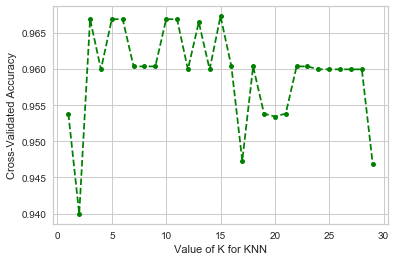

In [159]:
from sklearn import model_selection
import matplotlib.pyplot as plt

k_range=range(1,30)
k_scores=[]
for k in k_range:
    knn =KNeighborsClassifier(n_neighbors=k)
    scores =model_selection.cross_val_score(knn,X,y,scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores,marker='o',color='green',
         linestyle='dashed',markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# KNN 회귀 알고리즘
- 모델 만들때 k 개 이웃을 추가하는 것 제외한 나머지는 일반적인 회귀와 유사

In [162]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from math import sqrt

(404, 13) (102, 13)
RMSE value for k= 1 is 6.586394175517747
RMSE value for k= 2 is 5.709593749498621
RMSE value for k= 3 is 4.674796839456884
RMSE value for k= 4 is 4.9205314653968815
RMSE value for k= 5 is 5.0842690877709
RMSE value for k= 6 is 5.3050110934403385
RMSE value for k= 7 is 5.437776362145272
RMSE value for k= 8 is 5.7766325625103505
RMSE value for k= 9 is 5.9162730135904535
RMSE value for k= 10 is 6.032231158128644
RMSE value for k= 11 is 6.01209012555933
RMSE value for k= 12 is 6.034887564767879
RMSE value for k= 13 is 5.934959335454073
RMSE value for k= 14 is 5.943177815362587
RMSE value for k= 15 is 6.055387525401548
RMSE value for k= 16 is 6.0659727962688335
RMSE value for k= 17 is 6.1682431059235165
RMSE value for k= 18 is 6.185559955314015
RMSE value for k= 19 is 6.184915007192077


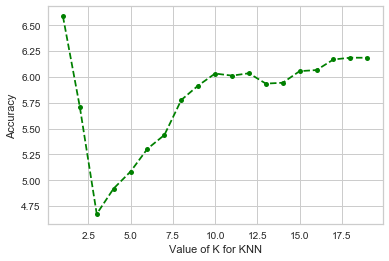

In [163]:
boston=load_boston()
x_train,x_test,y_train,y_test = train_test_split(boston.data,
                                                 boston.target,
                                                 test_size=0.2,
                                                 random_state=42)
print(x_train.shape,x_test.shape)
k_range =range(1,20)
rmse_val=[]
for K in range(1,20):
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    error =sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k=',K,'is',error)
plt.plot(k_range,rmse_val,marker='o',color='green',
         linestyle='dashed',markersize=5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()